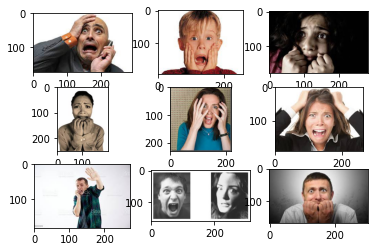

In [34]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/emotion/train/train/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'so'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [35]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/emotion/train/train/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('giandu'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ngacnhien'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('so'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hanhphuc'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('4emotion_photos.npy', photos)
save('4emotion_labels.npy', labels)

(40, 150, 150, 3) (40,)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [37]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 1s 199ms/step - loss: 1651.6799 - accuracy: 0.1250
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 2454.7969 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 3521.2632 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 852.8654 - accuracy: 0.2500
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 12.3971 - accuracy: 0.7250
Epoch 6/50
2/2 [==============================] - 0s 12ms/step - loss: 90.0026 - accuracy: 0.6250
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 44.2453 - accuracy: 0.7500
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 8.8410 - accuracy: 0.8250
Epoch 9/50
2/2 [==============================] - 0s 11ms/step - loss: 53.5051 - accuracy: 0.4750
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 6.0134 - accuracy: 0.8500
Epoch 11/

In [48]:
model.evaluate(photos,labels)

model.save('4emotion.h5')

from keras.models import load_model
models=load_model('4emotion.h5')

classes = ["giandu","hanhphuc","ngacnhien","so"]



2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000


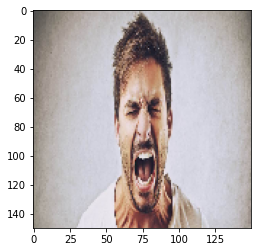

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/emotion/train/train/giandu1.jpg', target_size=(150,150))
plt.imshow(img)


In [51]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.15401764 0.108459   0.13240203 0.06781859 0.09189961 0.08869879
  0.09252764 0.09348478 0.09501877 0.07567313]]


'giandu'